In this notebook, I am going to predict whether a patient is having liver disease or not  based on certain features by applying machine learning techniques and tools used to predict liver disease.

Any patient whose age exceeded 89 is listed as being of age "90".

### Features:

* Age of the patient
* Gender of the patient
* Total Bilirubin
* Direct Bilirubin
* Alkaline Phosphotase
* Alamine Aminotransferase
* Aspartate Aminotransferase
* Total Protiens
* Albumin
* Albumin and Globulin Ratio
* Dataset: field used to split the data into two sets (patient with liver disease, or no disease)


Importing libraries

In [1]:
#importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import statsmodels.api as sm
import re
import traceback
import string
#scikitlearn libraries
from sklearn.metrics import accuracy_score, roc_curve, auc, roc_auc_score, confusion_matrix 
from sklearn.metrics import classification_report
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron, SGDClassifier, LogisticRegression 
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV, cross_val_score, GridSearchCV, KFold, train_test_split
import scikitplot as skplt
from xgboost import XGBClassifier
from sklearn.externals import joblib
from sklearn.preprocessing import StandardScaler, LabelEncoder
#tensorflow libraries
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from keras.layers.convolutional import Convolution2D
import plotly.figure_factory as ff 
import plotly.offline as py
import plotly.graph_objs as go 
from plotly.offline import download_plotlyjs,init_notebook_mode, iplot, plot
from plotly import tools 
py.init_notebook_mode(connected = True)
import warnings
import cufflinks as cf
cf.go_offline()

warnings.filterwarnings("ignore")

/home/abera/anaconda3/lib/python3.7/site-packages/sklearn/externals/joblib/__init__.py:15: FutureWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=FutureWarning)
Using TensorFlow backend.


In [2]:
data = pd.read_csv("data_liver.csv")
data.head()

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,Female,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,Male,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,Male,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,Male,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,Male,3.9,2.0,195,27,59,7.3,2.4,0.40,1


In [3]:
data.shape

(583, 11)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Age                         583 non-null    int64  
 1   Gender                      583 non-null    object 
 2   Total_Bilirubin             583 non-null    float64
 3   Direct_Bilirubin            583 non-null    float64
 4   Alkaline_Phosphotase        583 non-null    int64  
 5   Alamine_Aminotransferase    583 non-null    int64  
 6   Aspartate_Aminotransferase  583 non-null    int64  
 7   Total_Protiens              583 non-null    float64
 8   Albumin                     583 non-null    float64
 9   Albumin_and_Globulin_Ratio  579 non-null    float64
 10  Dataset                     583 non-null    int64  
dtypes: float64(5), int64(5), object(1)
memory usage: 50.2+ KB


In [5]:
#Checking nan values and list
data.isnull().sum()

Age                           0
Gender                        0
Total_Bilirubin               0
Direct_Bilirubin              0
Alkaline_Phosphotase          0
Alamine_Aminotransferase      0
Aspartate_Aminotransferase    0
Total_Protiens                0
Albumin                       0
Albumin_and_Globulin_Ratio    4
Dataset                       0
dtype: int64

In [6]:
#fill the null value with mean
data.fillna(data.mean(), inplace=True)
data.shape

(583, 11)

In [7]:
data.groupby(['Dataset']).count()


,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio
Dataset,,,,,,,,,,
1,416,416,416,416,416,416,416,416,416,416
2,167,167,167,167,167,167,167,167,167,167


In [8]:
liver_disease, no_liver_disease = data['Dataset'].value_counts()
print('Number of patient with liver disease: ', liver_disease)
print('Number of patient with no liver disease: ', no_liver_disease)


Number of patient with liver disease:  416
Number of patient with no liver disease:  167


In [9]:
data.dtypes

Age                             int64
Gender                         object
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [10]:
# assign our categorical variables to a numeric
x_to_be_replaced=['Male','Female']
Value=[1,0]
# replace the matching strings 
data['Gender'] = data['Gender'].replace(to_replace =x_to_be_replaced, value = Value, regex = True) 
 
data.head() 

,Age,Gender,Total_Bilirubin,Direct_Bilirubin,Alkaline_Phosphotase,Alamine_Aminotransferase,Aspartate_Aminotransferase,Total_Protiens,Albumin,Albumin_and_Globulin_Ratio,Dataset
0,65,0,0.7,0.1,187,16,18,6.8,3.3,0.90,1
1,62,1,10.9,5.5,699,64,100,7.5,3.2,0.74,1
2,62,1,7.3,4.1,490,60,68,7.0,3.3,0.89,1
3,58,1,1.0,0.4,182,14,20,6.8,3.4,1.00,1
4,72,1,3.9,2.0,195,27,59,7.3,2.4,0.40,1




EDA

In [11]:
#To see the disease vs non-disease distribution
LiverDisease = data[(data['Dataset'] == 1)]
NoLiverDisease = data[(data['Dataset'] != 1)]

trace = go.Pie(labels = ['Liver Disease', 'No Liver Disease'],
               values = data['Dataset'].value_counts(), 
               textfont=dict(size=10),
               opacity = 0.8,
               marker=dict(colors=['lightskyblue','gold'],
                           line=dict(color='#000000',width=1.05)))


layout = dict(title =  'Distribution of patient variable')
           
fig = dict(data = [trace], layout=layout)
py.iplot(fig)

trace = go.Bar(x = (len(LiverDisease), len(NoLiverDisease)),
               y = ['Liver Disease', 'No Liver Disease'], 
               orientation = 'h', opacity = 0.8, marker=dict(
        color=['gold', 'blue'],
        line=dict(color='#000000',width=1.0)))

layout = dict(title =  'Count of patient variable')
                    
fig = dict(data = [trace], layout=layout)
py.iplot(fig)




In [12]:
LiverDisease1, NoLiverDisease1 = data['Dataset'].value_counts()

print('% of Liver Disease Patients', round(LiverDisease1 / len(data) * 100, 2), '%')
print('% of No Liver Disease Patients', round(NoLiverDisease1 / len(data) * 100, 2), '%')

% of Liver Disease Patients 71.36 %
% of No Liver Disease Patients 28.64 %


Another way of checking missing values using heat map

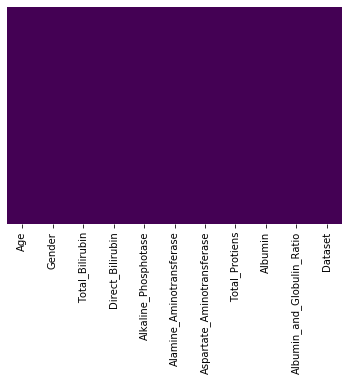

In [13]:
sns.heatmap(data.isnull(),cbar=False,yticklabels=False,cmap = 'viridis');

No missing data.

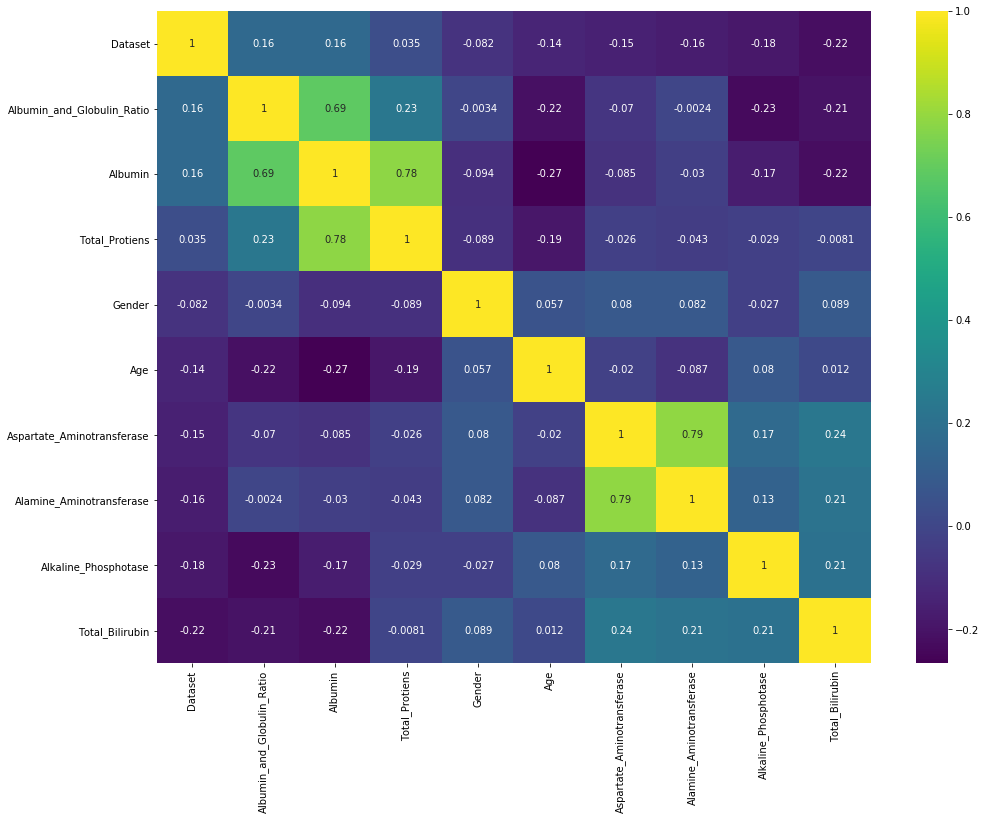

In [14]:
k = 10 #number of variables for heatmap
cols = data.corr().nlargest(k, 'Dataset')['Dataset'].index
cm = data[cols].corr()
plt.figure(figsize=(16,12))
sns.heatmap(cm, annot=True, cmap = 'viridis');

In [15]:
correlation = data.corr() #correlation between features
matrix_cols = correlation.columns.tolist() #tick labels
corr_array  = np.array(correlation) #convert the labels to array
#Plotting
trace = go.Heatmap(z = corr_array,
                   x = matrix_cols,
                   y = matrix_cols,
                   xgap = 2,
                   ygap = 2,
                   colorscale='Viridis',
                   colorbar   = dict() ,
                  )
layout = go.Layout(dict(title = 'Correlation Matrix for variables',
                        autosize = True,
                        height  = 900,
                        width   = 950,
                        margin  = dict(r = 0 ,l = 210,
                                       t = 25,b = 210,
                                     ),
                        yaxis   = dict(tickfont = dict(size = 9)),
                        xaxis   = dict(tickfont = dict(size = 9)),
                       )
                  )
fig = go.Figure(data = [trace],layout = layout)
py.iplot(fig)

#### Feature Importance

In [16]:
tst = data.corr()['Dataset'].copy()
tst = tst.drop('Dataset')
tst.sort_values(inplace=True)
tst.iplot(kind='barh',title='Feature Importances',xaxis_title="Features",
    yaxis_title="Correlation")

In [17]:
def plot_distribution(data_f, size_bin) :  
    tmp1 = NoLiverDisease[data_f]
    tmp2 = LiverDisease[data_f]
    hist_data = [tmp1, tmp2]
    
    group_labels = ['No Liver Disease', 'Liver Disease']
    colors = ['#FFD700', '#7EC0EE']

    fig = ff.create_distplot(hist_data, group_labels, colors = colors, show_hist = True, bin_size = size_bin, curve_type='kde')
    
    fig['layout'].update(title = data_f)

    py.iplot(fig, filename = 'Density plot')

In [18]:
data.dtypes

Age                             int64
Gender                          int64
Total_Bilirubin               float64
Direct_Bilirubin              float64
Alkaline_Phosphotase            int64
Alamine_Aminotransferase        int64
Aspartate_Aminotransferase      int64
Total_Protiens                float64
Albumin                       float64
Albumin_and_Globulin_Ratio    float64
Dataset                         int64
dtype: object

In [19]:
plot_distribution('Albumin_and_Globulin_Ratio', 1)

In [20]:
plot_distribution('Albumin', 1)

In [21]:
plot_distribution('Total_Protiens', 1)

In [22]:
def plot_feat1_feat2(feat1, feat2) :  
    trace0 = go.Scatter(
        x = NoLiverDisease[feat1],
        y = NoLiverDisease[feat2],
        name = 'NoLiverDisease',
        mode = 'markers', 
        marker = dict(color = 'blue',
            line = dict(
                width = 1)))

    trace1 = go.Scatter(
        x = LiverDisease[feat1],
        y = LiverDisease[feat2],
        name = 'LiverDisease',
        mode = 'markers',
        marker = dict(color = 'cyan',
            line = dict(
                width = 1)))

    layout = dict(title = feat1 +" "+"vs"+" "+ feat2,
                  yaxis = dict(title = feat2,zeroline = False),
                  xaxis = dict(title = feat1, zeroline = False)
                 )

    plots = [trace0, trace1]

    fig = dict(data = plots, layout=layout)
    py.iplot(fig)

In [23]:
plot_feat1_feat2('Albumin_and_Globulin_Ratio','Albumin')
plot_feat1_feat2('Total_Protiens','Albumin')
plot_feat1_feat2('Albumin_and_Globulin_Ratio','Total_Protiens')
plot_feat1_feat2('Albumin_and_Globulin_Ratio','Total_Bilirubin')
plot_feat1_feat2('Albumin_and_Globulin_Ratio','Direct_Bilirubin')
plot_feat1_feat2('Albumin','Total_Bilirubin')
plot_feat1_feat2('Albumin','Direct_Bilirubin')
plot_feat1_feat2('Total_Protiens','Total_Bilirubin')
plot_feat1_feat2('Total_Protiens','Direct_Bilirubin')

Scattering plot to see the relationship between features: Visualizing.

Disease distribution

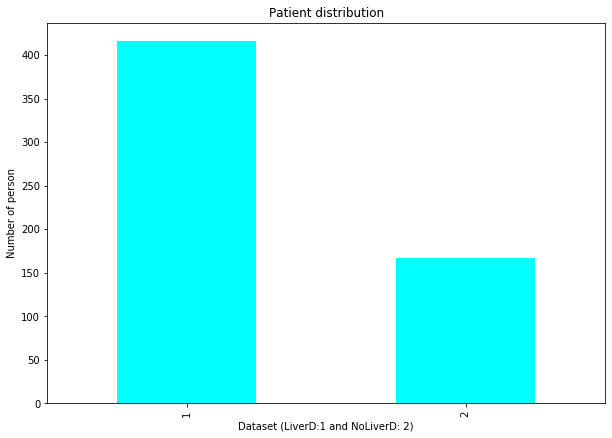

In [24]:
ax=data.groupby('Dataset').count()['Albumin'].plot(
    kind='bar',
    figsize=(10,7),
    title='Patient distribution',
    color='cyan'
)
ax.set_xlabel('Dataset (LiverD:1 and NoLiverD: 2)')
ax.set_ylabel('Number of person')
plt.show()

### Model Development

The model development start with splitting the dataset into train and test datsets: as a training set for the model and a test set to validate the predictions, respectively. The model  will underestimate the true error rate, a phenomenon known as overfitting if we do not split the dataset.  We will set the test size to 0.2; i.e., 80% of the data will be assigned to the training set, and the remaining 20% will be used as a test set. In order to obtain consistent results, we will set the random state parameter to a value of 42.

In [25]:
## if score==negative, mark 0 ;else 1 
def partition(x):
    if x == 2:
        return 0
    return 1

data['Dataset'] = data['Dataset'].map(partition)

Train-test Split:
---


In [26]:
X = data.drop('Dataset',axis=1)
y = data['Dataset']
# split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

### Data standardization
 
#### StandardScaler


In [27]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Method of Gaussian Naive Bayes

Gaussian Score: 
 0.55
Gaussian Test Score: 
 0.51
Accuracy: 
 0.5128205128205128
[[30  0]
 [57 30]]
              precision    recall  f1-score   support

           0       0.34      1.00      0.51        30
           1       1.00      0.34      0.51        87

    accuracy                           0.51       117
   macro avg       0.67      0.67      0.51       117
weighted avg       0.83      0.51      0.51       117



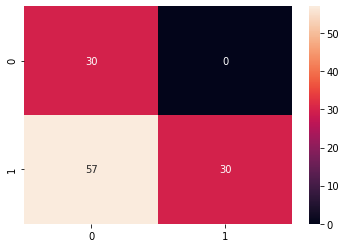

In [28]:
gaussian = GaussianNB() # Gaussian Naive Bayes
gaussian.fit(X_train, y_train)
#Output
gauss_predicted = gaussian.predict(X_test)
gauss_score = round(gaussian.score(X_train, y_train), 2)
gauss_score_test = round(gaussian.score(X_test, y_test), 2)
print('Gaussian Score: \n', gauss_score)
print('Gaussian Test Score: \n', gauss_score_test)
print('Accuracy: \n', accuracy_score(y_test, gauss_predicted))
print(confusion_matrix(y_test,gauss_predicted))
print(classification_report(y_test,gauss_predicted))
sns.heatmap(confusion_matrix(y_test,gauss_predicted),annot=True,fmt="d")

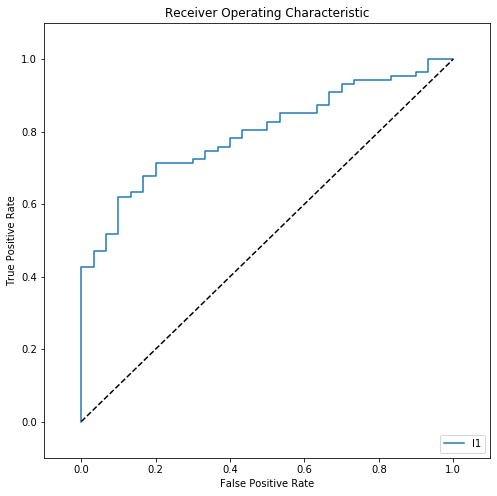

In [29]:
gauss_pred_proba = gaussian.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, gauss_pred_proba)
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [30]:
gauss_score_test = round(gaussian.score(X_test, y_test), 2)
gauss_score_test

0.51

#### Using Random Forest

Random Forest Score: 
 1.0
Random Forest Test Score: 
 0.74
Accuracy: 
 0.7435897435897436
[[13 17]
 [13 74]]
              precision    recall  f1-score   support

           0       0.50      0.43      0.46        30
           1       0.81      0.85      0.83        87

    accuracy                           0.74       117
   macro avg       0.66      0.64      0.65       117
weighted avg       0.73      0.74      0.74       117



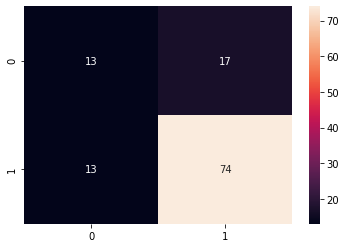

In [31]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)
#Predict Output
rf_predicted = random_forest.predict(X_test)
random_forest_score = round(random_forest.score(X_train, y_train), 2)
random_forest_score_test = round(random_forest.score(X_test, y_test), 2)
print('Random Forest Score: \n', random_forest_score)
print('Random Forest Test Score: \n', random_forest_score_test)
print('Accuracy: \n', accuracy_score(y_test,rf_predicted))
print(confusion_matrix(y_test,rf_predicted))
print(classification_report(y_test,rf_predicted))
sns.heatmap(confusion_matrix(y_test,rf_predicted),annot=True,fmt="d")

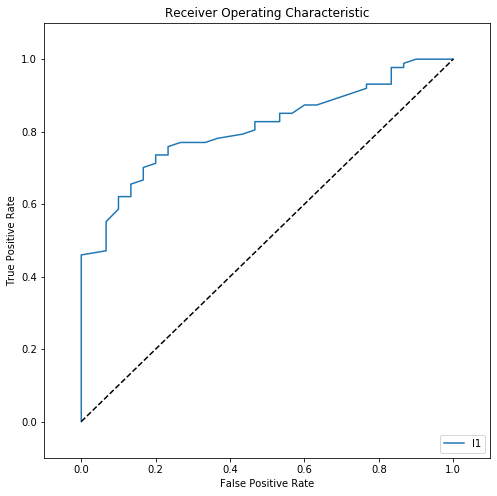

In [32]:
rf_pred_proba = random_forest.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, rf_pred_proba)
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [33]:
rf_score_test = round(random_forest.score(X_test, y_test), 2)
rf_score_test

0.74

### XGBoost

In [34]:
tuned_params = {'max_depth': [1, 2, 3, 4, 5], 'learning_rate': [0.01, 0.05, 0.1], 'n_estimators': [100, 200, 300, 400, 500], 'reg_lambda': [0.001, 0.1, 1.0, 10.0, 100.0]}
model_xgboost = RandomizedSearchCV(XGBClassifier(), tuned_params, n_iter=15, scoring = 'roc_auc', n_jobs=-1)
model_xgboost.fit(X_train, y_train)

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=Non...
                                           subsample=None, tree_method=None,
                                           validate_parameters=None,
                                           verbosity=None),
                  

In [35]:
model_xgboost.best_estimator_

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=2,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=10.0, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

XGBoost Score: 
 0.8
XGBoost Test Score: 
 0.83
Accuracy: 
 0.7777777777777778
[[ 8 22]
 [ 4 83]]
              precision    recall  f1-score   support

           0       0.67      0.27      0.38        30
           1       0.79      0.95      0.86        87

    accuracy                           0.78       117
   macro avg       0.73      0.61      0.62       117
weighted avg       0.76      0.78      0.74       117



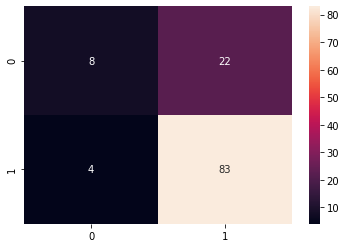

In [36]:
xgboost_train_pred = model_xgboost.predict(X_train)
xgboost_pred_proba = model_xgboost.predict_proba(X_test)[:,1]
# Display first 10 predictions
xgboost_pred_proba[:10]
#Predict Output
xgboost_predicted = model_xgboost.predict(X_test)
xgboost_score = round(model_xgboost.score(X_train, y_train), 2)
xgboost_score_test = round(model_xgboost.score(X_test, y_test), 2)
print('XGBoost Score: \n', xgboost_score)
print('XGBoost Test Score: \n', xgboost_score_test)
print('Accuracy: \n', accuracy_score(y_test,xgboost_predicted))
print(confusion_matrix(y_test,xgboost_predicted))
print(classification_report(y_test,xgboost_predicted))
sns.heatmap(confusion_matrix(y_test,xgboost_predicted),annot=True,fmt="d")

In [37]:
confusion_matrix(y_test, xgboost_predicted).T

array([[ 8,  4],
       [22, 83]])

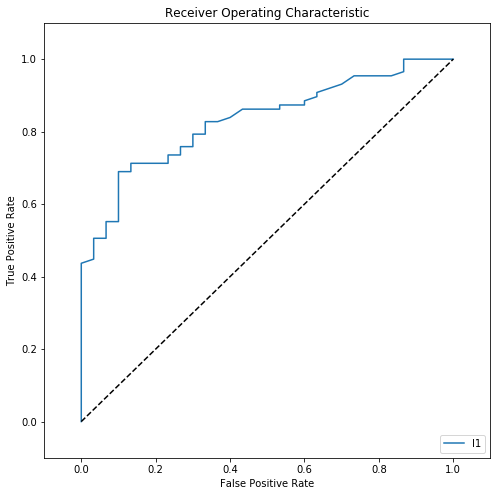

In [38]:
fpr, tpr, thresholds = roc_curve(y_test, xgboost_pred_proba)

# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')

# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [39]:
Xgboost_score_test = round(model_xgboost.score(X_test, y_test), 2)
Xgboost_score_test

0.83

### Using SVM

In [40]:
from sklearn import svm
def svc_param_selection(X, y, nfolds):
    Cs = [0.001, 0.01, 0.1, 1, 10]
    gammas = [0.001, 0.01, 0.1, 1]
    param_grid = {'C': Cs, 'gamma' : gammas}
    grid_search = GridSearchCV(svm.SVC(kernel='rbf'), param_grid, cv=nfolds)
    grid_search.fit(X_train, y_train)
    grid_search.best_params_
    return grid_search.best_params_

model_svm=SVC(kernel='rbf',probability=True)
model_svm.fit(X_train,y_train)

svc_param_selection(X_train,y_train,5)

{'C': 0.001, 'gamma': 0.001}

SVM Score: 
 0.71
SVM Test Score: 
 0.74
Accuracy: 
 0.7435897435897436
[[ 0 30]
 [ 0 87]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.74      1.00      0.85        87

    accuracy                           0.74       117
   macro avg       0.37      0.50      0.43       117
weighted avg       0.55      0.74      0.63       117



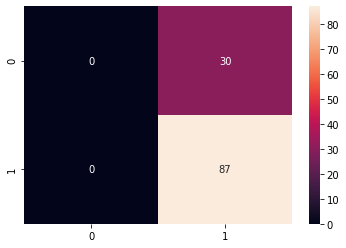

In [41]:
## Predict Train results
svm_pred = model_svm.predict(X_train)
## Predict Test results
svm_predicted = model_svm.predict(X_test)
svm_score = round(model_svm.score(X_train, y_train), 2)
svm_score_test = round(model_svm.score(X_test, y_test), 2)
print('SVM Score: \n', svm_score)
print('SVM Test Score: \n', svm_score_test)
print('Accuracy: \n', accuracy_score(y_test,svm_predicted))
print(confusion_matrix(y_test,svm_predicted))
print(classification_report(y_test,svm_predicted))
sns.heatmap(confusion_matrix(y_test,svm_predicted),annot=True,fmt="d")

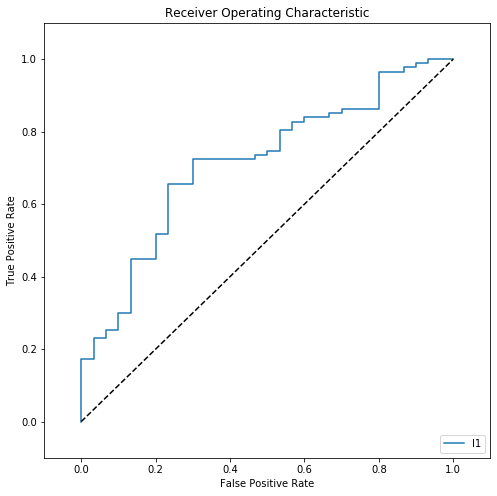

In [42]:
svm_pred_proba = model_svm.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, svm_pred_proba)
# Plot the ROC curve
fig = plt.figure(figsize=(8,8))
plt.title('Receiver Operating Characteristic')
# Plot ROC curve
plt.plot(fpr, tpr, label='l1')
plt.legend(loc='lower right')

# Diagonal 45 degree line
plt.plot([0,1],[0,1],'k--')

# Axes limits and labels
plt.xlim([-0.1,1.1])
plt.ylim([-0.1,1.1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [43]:
svm_score_test = round(model_svm.score(X_test, y_test), 2)
svm_score_test

0.74

Save the winning model

In [44]:
###Model evaluation
#We can now rank our evaluation of all the models to choose the best one for our problem. 
models = pd.DataFrame({
    'Model': [  'Gaussian Naive Bayes','Random Forest','SVM','XGBoost'],
    'Train Score': [  gauss_score, random_forest_score, svm_score, xgboost_score],
    'Test Score': [  gauss_score_test, random_forest_score_test, svm_score_test, xgboost_score_test]})
models.sort_values(by='Test Score', ascending=False)

,Model,Train Score,Test Score
3,XGBoost,0.80,0.83
1,Random Forest,1.00,0.74
2,SVM,0.71,0.74
0,Gaussian Naive Bayes,0.55,0.51


The XGBoost model is a winning model having high score in both train and test. A XGBoost Classifier model is a successful model here and it can  effectively assign each observation a probability ranging from 0 to 1. The numbers between 0 or 1, the predictions should show "Liver Disease (LD)" or "No Liver Desease(NLD)", denoting malignant and benign respectively. Let's apply a threshhold value of 0.5 to our predictions, assigning all values closer to 0 a label of "NLD" and assigniing all values closer to 1 a label of "LD". Here, Random forest looks good in terms of train score, however, it is offerfitting as the test score is low compared to the train score.

**Predicting the first ten values**

In [45]:
xgboost_pred_proba = model_xgboost.predict_proba(X_test)[:,1]
xgboost_predicted = ["LD" if x < 0.5 else "NLD" for x in xgboost_pred_proba]
xgboost_predicted[1:11]

['NLD', 'NLD', 'NLD', 'NLD', 'NLD', 'LD', 'NLD', 'NLD', 'NLD', 'LD']